## Individual household electric power consumption
#### https://archive.ics.uci.edu/dataset/484/travel+reviews

#Additional Variable Information
Atributes represent average user feedback


In [6]:
import pandas as pd 
import numpy as np
from pathlib import Path
print()
Power_consumption = pd.read_csv(f'{Path.cwd()}/household_power_consumption.csv'
            , delimiter=',')


#### The most significant difference between the active and reactive power is that the active power is the actual power which is dissipated in the circuit. Whereas, the reactive power is the useless power which only flows between the source and load. 


In [7]:
Power_consumption

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2049275,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2049276,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2049277,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2049278,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [8]:
mask = pd.to_numeric(Power_consumption['Global_active_power'], errors='coerce').isna()
df_filtered = Power_consumption[~mask]

In [9]:
df_filtered.to_csv(f'{Path.cwd()}/household_power_consumption.csv', index=None)

In [10]:
# Travel_Reviews = Travel_Reviews[~(Travel_Reviews['theaters'] <= 1)]  
# Travel_Reviews = Travel_Reviews.sort_values('theaters')

In [11]:


import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

revs_X = np.array([float(i) for i in df_filtered['Global_active_power']])
random_noise  = []
for Xs in revs_X:
    random_val = np.random.uniform(0.01, 0.70)
    random_noise += [random_val] 
revs_y  = 0.9 * revs_X + random_noise
revs_y = np.array([float(i) for i in revs_y])
revs_X = np.reshape(revs_X, (-1, 1))
revs_y = np.reshape(revs_y, (-1, 1))


In [12]:
print(len(revs_y), max(revs_y), ' ', revs_y)

2049280 [10.70414624]   [[4.0701755 ]
 [4.97530197]
 [4.87311762]
 ...
 [0.97552834]
 [1.5202177 ]
 [1.26907646]]


In [13]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [14]:
# Shuffle data
X = revs_X
y = revs_y
NUM_SAMPLES = len(df_filtered['Global_active_power'])
indices = list(range(NUM_SAMPLES))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [15]:
# Split indices
train_start = 0
train_end = int(0.7*NUM_SAMPLES)
val_start = train_end
val_end = int((TRAIN_SIZE+VAL_SIZE)*NUM_SAMPLES)
test_start = val_end

In [16]:
# Split data
X_train = X[train_start:train_end]
y_train = y[train_start:train_end]
X_val = X[val_start:val_end]
y_val = y[val_start:val_end]
X_test = X[test_start:]
y_test = y[test_start:]
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_test: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (1434496, 1), y_train: (1434496, 1)
X_val: (307392, 1), y_test: (307392, 1)
X_test: (307392, 1), y_test: (307392, 1)


In [17]:
def normalize_data(data, mean, std):
    return (data - mean)/std

In [18]:
# Determine means and stds
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

In [19]:
# Standardize
X_train = normalize_data(X_train, X_mean, X_std)
y_train = normalize_data(y_train, y_mean, y_std)
X_val = normalize_data(X_val, X_mean, X_std)
y_val = normalize_data(y_val, y_mean, y_std)
X_test = normalize_data(X_test, X_mean, X_std)
y_test = normalize_data(y_test, y_mean, y_std)

In [20]:

# Check (means should be ~0 and std should be ~1)
print (f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print (f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")

mean: -0.0, std: 1.0
mean: -0.0, std: 1.0


In [21]:
INPUT_DIM = X_train.shape[1] # X is 1-dimensional
OUTPUT_DIM = y_train.shape[1] # y is 1-dimensional
print(INPUT_DIM, OUTPUT_DIM)

1 1


In [22]:
# Initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1, 1))
print (f"W: {W.shape}")
print (f"b: {b.shape}")

W: (1, 1)
b: (1, 1)


In [23]:

# Forward pass [NX1] · [1X1] = [NX1]
y_pred = np.dot(X_train, W) + b
print (f"y_pred: {y_pred.shape}")

y_pred: (1434496, 1)


In [24]:
# Loss
N = len(y_train)
loss = (1/N) * np.sum((y_train - y_pred)**2)
print (f"loss: {loss:.2f}")

loss: 1.00


In [25]:
# Backpropagation
dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
db = -(2/N) * np.sum((y_train - y_pred) * 1)

In [26]:
LEARNING_RATE = 1e-1

In [27]:

# Update weights
W += -LEARNING_RATE * dW
b += -LEARNING_RATE * db

In [28]:
NUM_EPOCHS = 100

In [29]:
def gd():
    # Initialize random weights
    W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
    b = np.zeros((1, ))

    # gradient descent
    # Training loop
    for epoch_num in range(NUM_EPOCHS):
        # Forward pass [NX1] · [1X1] = [NX1]
        y_pred = np.dot(X_train, W) + b

        # Loss
        loss = (1/len(y_train)) * np.sum((y_train - y_pred)**2)

        # Show progress
        if epoch_num%10 == 0:
            print (f"Epoch: {epoch_num}, loss: {loss:.3f}")

        # Backpropagation
        dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
        db = -(2/N) * np.sum((y_train - y_pred) * 1)

        # Update weights
        W += -LEARNING_RATE * dW
        b += -LEARNING_RATE * db

    return W, b

In [30]:
def sgd():
    # Initialize random weights
    W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
    b = np.zeros((1, ))

    # stochastic gradient descent
    # Training loop
    batch_size = 20
    train_xy = np.append(X_train, y_train, axis=1)


    for epoch_num in range(NUM_EPOCHS):
        # shuffle
        np.random.shuffle(train_xy)

        for start in range(0, N, batch_size):
            stop = start + int(batch_size / 2)
            # print(f'{start}, {stop}, {batch_size}')
            x_batch, y_batch = train_xy[start:stop, :-1], train_xy[start:stop, -1:]
            #x_batch, y_batch = X_train[start:stop], y_train[start:stop]


            y_pred = np.dot(x_batch, W) + b
            loss = (1 / len(y_batch)) * np.sum((y_batch - y_pred) ** 2)

            dW = -(2 / batch_size) * np.sum((y_batch - y_pred) * x_batch)
            db = -(2 / batch_size) * np.sum((y_batch - y_pred) * 1)

            # Update weights
            W += -LEARNING_RATE * dW
            b += -LEARNING_RATE * db
        # Show progress
        if epoch_num % 10 == 0:
            print (f"Epoch: {epoch_num}, loss: {loss:.3f}")

    return W, b

In [31]:
def sgd_momentum(decay_rate=0.0):
    # Initialize random weights
    W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
    b = np.zeros((1, ))

    # stochastic gradient descent
    # Training loop
    batch_size = 10
    train_xy = np.append(X_train, y_train, axis=1)


    for epoch_num in range(NUM_EPOCHS):
        # shuffle
        np.random.shuffle(train_xy)

        for start in range(0, N, batch_size):
            stop = start + batch_size
            # print(f'{start}, {stop}, {batch_size}')
            x_batch, y_batch = train_xy[start:stop, :-1], train_xy[start:stop, -1:]
            #x_batch, y_batch = X_train[start:stop], y_train[start:stop]


            y_pred = np.dot(x_batch, W) + b
            loss = (1 / len(y_batch)) * np.sum((y_batch - y_pred) ** 2)

            dW = -(2 / batch_size) * np.sum((y_batch - y_pred) * x_batch)
            db = -(2 / batch_size) * np.sum((y_batch - y_pred) * 1)

            # Update weights
            W += decay_rate * dW - LEARNING_RATE * dW
            b += decay_rate * db - LEARNING_RATE * db
        # Show progress
        if epoch_num % 10 == 0:
            print (f"Epoch: {epoch_num}, loss: {loss:.3f}")

    return W, b

Gradient descent
Epoch: 0, loss: 1.011
Epoch: 10, loss: 0.053
Epoch: 20, loss: 0.042
Epoch: 30, loss: 0.042
Epoch: 40, loss: 0.042
Epoch: 50, loss: 0.042
Epoch: 60, loss: 0.042
Epoch: 70, loss: 0.042
Epoch: 80, loss: 0.042
Epoch: 90, loss: 0.042
W: [[0.97875326]]; b: [3.95136542e-16];
train_MSE: 0.04, test_MSE: 0.04


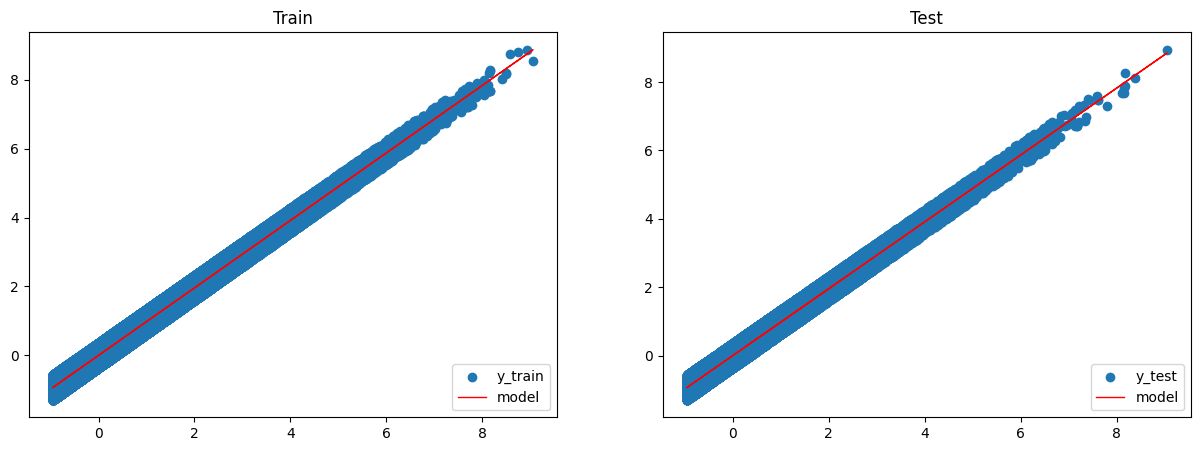

Stochastic gradient descent
Epoch: 0, loss: 0.045
Epoch: 10, loss: 0.039
Epoch: 20, loss: 0.050
Epoch: 30, loss: 0.056
Epoch: 40, loss: 0.030
Epoch: 50, loss: 0.031
Epoch: 60, loss: 0.027
Epoch: 70, loss: 0.032
Epoch: 80, loss: 0.039
Epoch: 90, loss: 0.039
W: [[0.94242727]]; b: [-0.00513372];
train_MSE: 0.04, test_MSE: 0.04


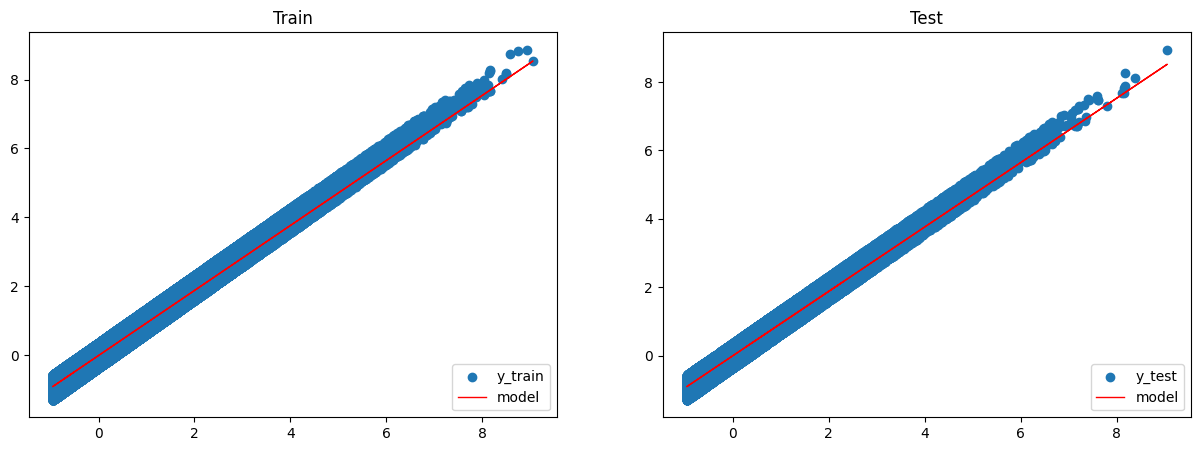

Stochastic gradient descent with momentum
Epoch: 0, loss: 0.031
Epoch: 10, loss: 0.006
Epoch: 20, loss: 0.070
Epoch: 30, loss: 0.020
Epoch: 40, loss: 0.065
Epoch: 50, loss: 0.018
Epoch: 60, loss: 0.027
Epoch: 70, loss: 0.047
Epoch: 80, loss: 0.043
Epoch: 90, loss: 0.041
W: [[0.94193186]]; b: [0.01100293];
train_MSE: 0.04, test_MSE: 0.04


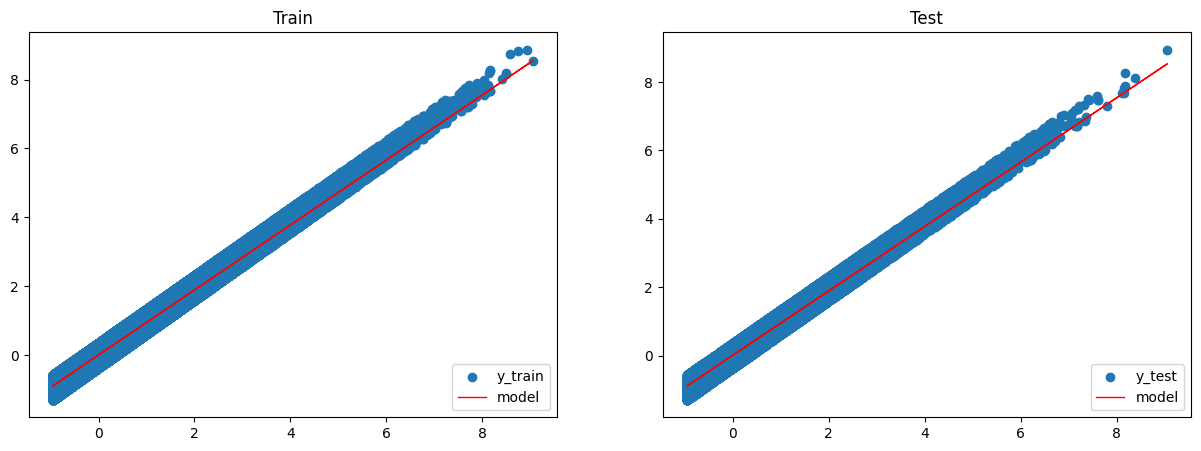

In [32]:
def evaluation(W, b):
    print(f'W: {W}; b: {b};')
    # Predictions 
    pred_train = W * X_train + b
    pred_test = W * X_test + b

    # Train and test MSE
    train_mse = np.mean((y_train - pred_train) ** 2)
    test_mse = np.mean((y_test - pred_test) ** 2)
    print (f"train_MSE: {train_mse:.2f}, test_MSE: {test_mse:.2f}")

    # Figure size
    plt.figure(figsize=(15,5))

    # Plot train data
    plt.subplot(1, 2, 1)
    plt.title("Train")
    plt.scatter(X_train, y_train, label="y_train")
    plt.plot(X_train, pred_train, color="red", linewidth=1, linestyle="-", label="model")
    plt.legend(loc="lower right")

    # Plot test data
    plt.subplot(1, 2, 2)
    plt.title("Test")
    plt.scatter(X_test, y_test, label='y_test')
    plt.plot(X_test, pred_test, color="red", linewidth=1, linestyle="-", label="model")
    plt.legend(loc="lower right")

    # Show plots
    plt.show()

print('Gradient descent')
W, b = gd()
evaluation(W, b)

print('Stochastic gradient descent')
W, b = sgd()
evaluation(W, b)

print('Stochastic gradient descent with momentum')
W, b = sgd_momentum(0.01)
evaluation(W, b)

In [33]:
# Unscaled weights
W_unscaled = W * (y_std/X_std)
b_unscaled = b * y_std + y_mean - np.sum(W_unscaled*X_mean)
print ("[actual] y = 0.9X + noise")
print (f"[model] y_hat = {W_unscaled[0][0]:.1f}X + {b_unscaled[0]:.1f}") 

[actual] y = 0.9X + noise
[model] y_hat = 0.9X + 0.4


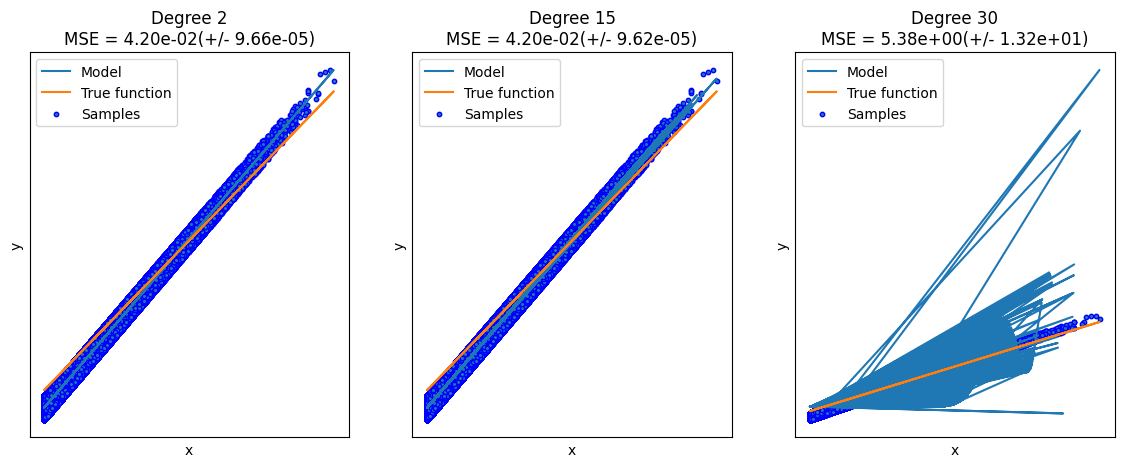

In [34]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def true_fun(X):
    return W_unscaled[0][0] * X + b_unscaled[0]

np.random.seed(0)

degrees = [2, 15, 30]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X_train, y_train)

    # Make predictions based on test data
    y_pred = pipeline.predict(X_test)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X_train, y_train, scoring="neg_mean_squared_error", cv=10
    )

    plt.plot(X_test, y_pred, label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X_train, y_train, edgecolor="b", s=10, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()


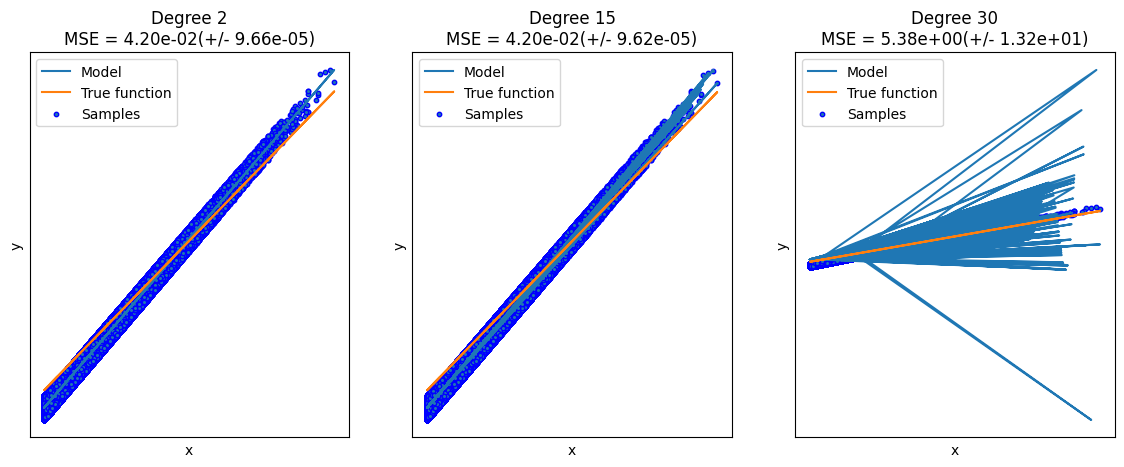

In [35]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def true_fun(X):
    return W_unscaled[0][0] * X + b_unscaled[0]

np.random.seed(0)

degrees = [2, 15, 30]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X_train, y_train)

    # Make predictions based on train data
    y_pred_train = pipeline.predict(X_train)

    # Evaluate the models using cross-validation on train data
    scores_train = cross_val_score(
        pipeline, X_train, y_train, scoring="neg_mean_squared_error", cv=10
    )

    plt.plot(X_train, y_pred_train, label="Model")
    plt.plot(X_train, true_fun(X_train), label="True function")
    plt.scatter(X_train, y_train, edgecolor="b", s=10, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores_train.mean(), scores_train.std()
        )
    )
plt.show()


## Find best alpha(regularization)

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Define the range of alpha values to test
param_grid = {'ridge_regression__alpha': [0.01, 0.1, 1, 10]}

# Create a pipeline with polynomial features and Ridge regression
pipeline = Pipeline([
    ("polynomial_features", PolynomialFeatures(degree=degrees[i], include_bias=False)),
    ("ridge_regression", Ridge())
])

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, scoring="neg_mean_squared_error", cv=10)
grid_search.fit(X_train, y_train)

# Get the best regularization value and corresponding MSE score
best_alpha = grid_search.best_params_['ridge_regression__alpha']
best_score = -grid_search.best_score_

print("Best Regularization Value:", best_alpha)
print("Best MSE Score:", best_score)

Best Regularization Value: 0.01
Best MSE Score: 1.0000363517742534


/home/petr/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.01202e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/petr/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.2754e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/petr/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.16318e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/petr/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.2351e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/petr/.local/lib/python3.8/site-packages/sklearn/linear_model

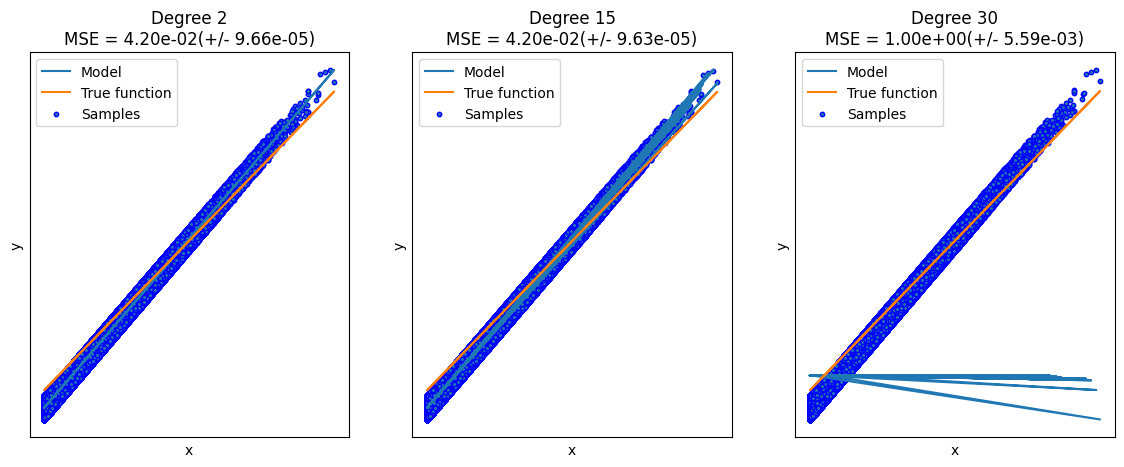

In [37]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def true_fun(X):
    return W_unscaled[0][0] * X + b_unscaled[0]

np.random.seed(0)

degrees = [2, 15, 30]
alpha = 0.01  # Regularization strength

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    ridge_regression = Ridge(alpha=alpha)
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("ridge_regression", ridge_regression),
        ]
    )
    pipeline.fit(X_train, y_train)

    # Make predictions based on train data
    y_pred_train = pipeline.predict(X_train)

    # Evaluate the models using cross-validation on train data
    scores_train = cross_val_score(
        pipeline, X_train, y_train, scoring="neg_mean_squared_error", cv=10
    )

    plt.plot(X_train, y_pred_train, label="Model")
    plt.plot(X_train, true_fun(X_train), label="True function")
    plt.scatter(X_train, y_train, edgecolor="b", s=10, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores_train.mean(), scores_train.std()
        )
    )
plt.show()


In [38]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset for classification
X, y = make_classification(n_samples=1000, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Fit the model to the training data
mlp.fit(X_train, y_train)

# Predict on the test data
y_pred = mlp.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.82


## PERCEPTRON + MLP

In [51]:
import random


#### Build a model using Perceptron and MLPClassifier. On the basis of experiments with MLPClassifier, select best values for 
 - learning rate(eta0=(perc), learning_rate=(mlp)), 
 - the regularization parameter(alpha=, max_iter=, tol=), 
 - the optimization function(activation, solver, penalty). 
Try different architectures for the MLPClassifier (number of hidden layers and number of neurons in each layer). Use f1 score for evaluation.
#### Build learning curves for better explanation of your experiments for training set and validation set on the same plot (f1_score on the max_iter parameter for MLPClassifier).

eta0 = random.choice(np.linspace(0.0001, 0.9, 20))
tol = random.choice(np.linspace(0.0001, 0.9, 20))
alpha = random.choice(np.linspace(0.0001, 0.9, 20))
max_iter = random.choice(np.linspace(200, 2000, 20))
penalty = random.choice(['l2', 'l1', 'elasticnet'])
solver = random.choice(['lbfgs', 'sgd', 'adam'])
activation = random.choice(['relu', 'identity', 'logistic', 'tanh'])

1

In [39]:
# -*- coding: utf-8 -*- 
#Необходимые импорты 
import numpy as np 
import pandas 
from sklearn.linear_model import Perceptron 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score 
from sklearn.neural_network import MLPClassifier 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap 
#функция расчета медианы 
def median(lst): 
 return np.median(np.array(lst)) 

In [40]:
max([float(power) for power in df_filtered['Global_active_power'].to_list()])


11.122

In [41]:
min([float(power) for power in df_filtered['Global_active_power'].to_list()])

0.076

In [42]:
rs = np.linspace(0,100,num=100)

In [43]:
acc_p = [] 
acc_pn = [] 
acc_mlp = [] 
acc_mlpn = [] 

In [61]:
random.choice(np.linspace(0.0001, 0.9, 20))

0

In [131]:
eta_random = random.choice(np.linspace(0.0001, 0.1, 20))
tol_random = random.choice(np.linspace(0.0001, 0.1, 20))
alpha_random = random.choice(np.linspace(0.0001, 0.1, 20))
max_iter_random = random.choice(np.linspace(200, 2000, 20).astype(int))
penalty_random = random.choice(['l2', 'l1', 'elasticnet'])
solver_random = random.choice(['lbfgs', 'sgd', 'adam'])
activation_random = random.choice(['relu', 'identity', 'logistic', 'tanh'])

print(f'eta_random:{eta_random}, tol_random:{tol_random}, alpha_random:{alpha_random}')
print(f'max_iter_random:{max_iter_random}, penalty_rando:{penalty_random}, solver_random:{solver_random}, activation_random:{activation_random}')
#Цикл прогона моделей 
for i in rs: 
    i = int(i) 
    #Распечатка номера итерации 
    print ("Random: ", i )
    #Создание модели персептрона 
    clf = Perceptron(random_state=i,eta0 = eta_random, alpha= alpha_random
                     , max_iter= max_iter_random, tol= tol_random, penalty= penalty_random)  ###########################################
    #Обучение модели 
    clf.fit(X_train, y_train) 
    #Получение прогноза 
    predictions = clf.predict(X_test) 
    # Расчет показателя accuracy 
    acc = accuracy_score(y_test, predictions) 
    #Распечатка результата 
    print ("Perceptron: ", acc )
    #Добавление оценки в список оценок для модели персептрона 
    acc_p.append(acc) 
    #Нормализация данных 
    scaler = StandardScaler() 
    X_train_scaled = scaler.fit_transform(X_train) 
    X_test_scaled = scaler.transform(X_test) 
    #Работа пресептрона с нормализованными данными 
    clf = Perceptron(random_state=i,eta0 = eta_random, alpha= alpha_random
                     , max_iter= max_iter_random, tol= tol_random, penalty= penalty_random) ###########################################
    clf.fit(X_train_scaled, y_train) 
    predictions = clf.predict(X_test_scaled) 
    acc = accuracy_score(y_test, predictions) 
    print ("Perceptron with normalization: ", acc )
    acc_pn.append(acc) 
    #Создание многослойного классификатора 
    mlp = MLPClassifier(random_state=i, solver=solver_random, activation=activation_random
                        , alpha= alpha_random, tol= tol_random, hidden_layer_sizes=(2, ), max_iter= max_iter_random) ###########################################
    

#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

eta_random:0.06319473684210526, tol_random:0.07896842105263159, alpha_random:0.1
max_iter_random:294, penalty_rando:l1, solver_random:lbfgs, activation_random:logistic
Random:  0
Perceptron:  0.85
Perceptron with normalization:  0.855
Random:  1
Perceptron:  0.85
Perceptron with normalization:  0.855
Random:  2
Perceptron:  0.465
Perceptron with normalization:  0.465
Random:  3
Perceptron:  0.85
Perceptron with normalization:  0.495
Random:  4
Perceptron:  0.85
Perceptron with normalization:  0.855
Random:  5
Perceptron:  0.85
Perceptron with normalization:  0.855
Random:  6
Perceptron:  0.85
Perceptron with normalization:  0.855
Random:  7
Perceptron:  0.85
Perceptron with normalization:  0.855
Random:  8
Perceptron:  0.85
Perceptron with normalization:  0.855
Random:  9
Perceptron:  0.465
Perceptron with normalization:  0.855
Random:  10
Perceptron:  0.8
Perceptron with normalization:  0.855
Random:  11
Perceptron:  0.8
Perceptron with normalization:  0.855
Random:  12
Perceptron:  0

eta_random:0.06319473684210526, tol_random:0.07896842105263159, alpha_random:0.1
max_iter_random:294, penalty_rando:l1, solver_random:lbfgs, activation_random:logistic
MLP:  0.7
MLPwith Norm:  0.65
Perceptron:  0.31 0.785 0.875 0.12950773950007582
Perceptron with Norm:  0.365 0.775 0.87 0.13238489800132364
MLP:  0.465 0.695 0.875 0.17387415628040362
MLP with Norm:  0.465 0.6575 0.88 0.176776381026677


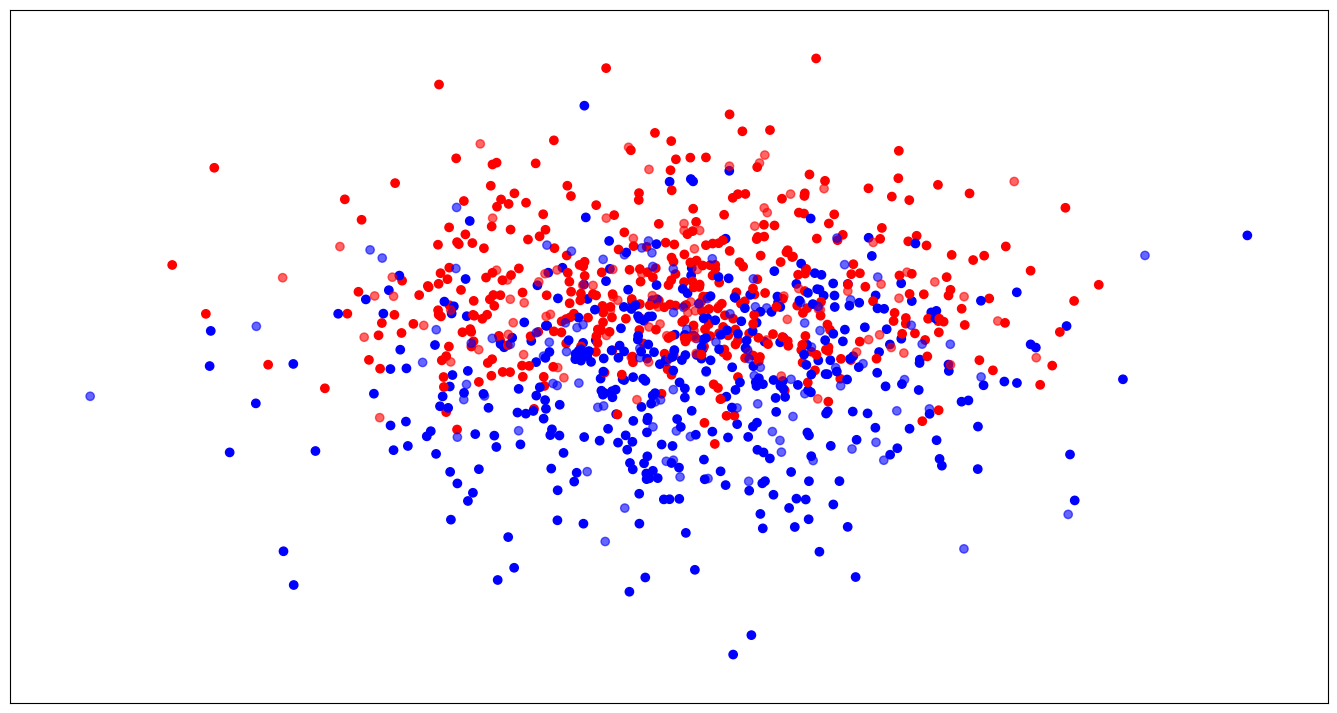

In [132]:
print(f'eta_random:{eta_random}, tol_random:{tol_random}, alpha_random:{alpha_random}')
print(f'max_iter_random:{max_iter_random}, penalty_rando:{penalty_random}, solver_random:{solver_random}, activation_random:{activation_random}')
mlp.fit(X_train, y_train) 
#Работа с ненормализованными данными 
predictions = mlp.predict(X_test) 
acc = accuracy_score(y_test, predictions) 
print ("MLP: ", acc) 
acc_mlp.append(acc) 
#Работа с нормализованными данными 
mlp = MLPClassifier(random_state=i, solver=solver_random, activation=activation_random
                        , alpha= alpha_random, tol= tol_random, hidden_layer_sizes=(2, ), max_iter= max_iter_random) ###############################
mlp.fit(X_train_scaled, y_train) 
predictions = mlp.predict(X_test_scaled) 
acc = accuracy_score(y_test, predictions) 
print ("MLPwith Norm: ", acc) 
acc_mlpn.append(acc) 
#Распечатка итоговых результатов 
print ("Perceptron: ", min(acc_p), median(acc_p), max(acc_p), np.std(acc_p))
print ("Perceptron with Norm: ", min(acc_pn), median(acc_pn), max(acc_pn), 
np.std(acc_pn)) 
print ("MLP: ", min(acc_mlp), median(acc_mlp), max(acc_mlp), np.std(acc_mlp)) 
print ("MLP with Norm: ", min(acc_mlpn), median(acc_mlpn), max(acc_mlpn), 
np.std(acc_mlpn)) 
#Расчет минимума и максимума для графика 
X = np.concatenate((X_train, X_test), axis=0) 
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 
#Построение графика 
figure = plt.figure(figsize=(17, 9)) 
cm = plt.cm.RdBu 
cm_bright = ListedColormap(['#FF0000', '#0000FF']) 
ax = plt.subplot(1, 1, 1) 
# Точки из обучающей выборки 
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright) 
# Тестовые точки 
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6) 
ax.set_xlim(x_min, x_max) 
ax.set_ylim(y_min, y_max) 
ax.set_xticks(()) 
ax.set_yticks(()) 
plt.show() 

eta_random:0.07371052631578948, tol_random:0.0001, alpha_random:0.06319473684210526
max_iter_random:957, penalty_rando:elasticnet, solver_random:sgd, activation_random:identity
MLP:  0.855
MLPwith Norm:  0.855
Perceptron:  0.31 0.775 0.875 0.13150055401852848
Perceptron with Norm:  0.365 0.765 0.87 0.1329833572788294
MLP:  0.465 0.6074999999999999 0.875 0.17916472867168917
MLP with Norm:  0.465 0.5875 0.88 0.18610779433197072

eta_random:0.1, tol_random:0.0947421052631579, alpha_random:0.05793684210526316
max_iter_random:863, penalty_rando:l1, solver_random:lbfgs, activation_random:identity
MLP:  0.81
MLPwith Norm:  0.8
Perceptron:  0.31 0.775 0.875 0.1317340361005725
Perceptron with Norm:  0.365 0.765 0.87 0.13338592619209286
MLP:  0.465 0.75 0.875 0.17840876519947105
MLP with Norm:  0.465 0.7375 0.88 0.18447408354562977

eta_random:0.08422631578947369, tol_random:0.1, alpha_random:0.07896842105263159
max_iter_random:1810, penalty_rando:elasticnet, solver_random:lbfgs, activation_random:tanh
MLP:  0.825
MLPwith Norm:  0.665
Perceptron:  0.31 0.78 0.875 0.13120617515690924
Perceptron with Norm:  0.365 0.765 0.87 0.13299413502773227
MLP:  0.465 0.81 0.875 0.17523950552749415
MLP with Norm:  0.465 0.7375 0.88 0.17799387119173

eta_random:0.05267894736842106, tol_random:0.0001, alpha_random:0.07371052631578948
max_iter_random:1336, penalty_rando:elasticnet, solver_random:adam, activation_random:tanh
MLP:  0.87
MLPwith Norm:  0.865
Perceptron:  0.31 0.78 0.875 0.13078805503433402
Perceptron with Norm:  0.365 0.77 0.87 0.13243293763692937
MLP:  0.465 0.81 0.875 0.17551086653598325
MLP with Norm:  0.465 0.8 0.88 0.17834144520414966

eta_random:0.015873684210526314, tol_random:0.015873684210526314, alpha_random:0.03164736842105263
max_iter_random:1810, penalty_rando:l1, solver_random:sgd, activation_random:tanh
MLP:  0.525
MLPwith Norm:  0.5
Perceptron:  0.31 0.78 0.875 0.1308086240348229
Perceptron with Norm:  0.365 0.77 0.87 0.13270047181481814
MLP:  0.465 0.81 0.875 0.175049472173821
MLP with Norm:  0.465 0.7375 0.88 0.178385774026406

eta_random:0.01061578947368421, tol_random:0.02638947368421053, alpha_random:0.01061578947368421
max_iter_random:768, penalty_rando:l1, solver_random:sgd, activation_random:relu
MLP:  0.47
MLPwith Norm:  0.465
Perceptron:  0.31 0.785 0.875 0.13029183066259217
Perceptron with Norm:  0.365 0.77 0.87 0.13224441530000713
MLP:  0.465 0.81 0.875 0.17664087862100325
MLP with Norm:  0.465 0.675 0.88 0.1795888637972856

eta_random:0.02638947368421053, tol_random:0.0001, alpha_random:0.03164736842105263
max_iter_random:1905, penalty_rando:l2, solver_random:sgd, activation_random:tanh
MLP:  0.86
MLPwith Norm:  0.86
Perceptron:  0.31 0.785 0.875 0.12910917351581758
Perceptron with Norm:  0.365 0.77 0.87 0.13108855498645752
MLP:  0.465 0.75 0.875 0.17901828019187632
MLP with Norm:  0.465 0.67 0.88 0.18162426173003318

eta_random:0.05793684210526316, tol_random:0.05793684210526316, alpha_random:0.03690526315789474
max_iter_random:1336, penalty_rando:l1, solver_random:sgd, activation_random:identity
MLP:  0.575
MLPwith Norm:  0.54
Perceptron:  0.31 0.785 0.875 0.12918863332495173
Perceptron with Norm:  0.365 0.775 0.87 0.13152122544447048
MLP:  0.465 0.69 0.875 0.17673448245586296
MLP with Norm:  0.465 0.665 0.88 0.17979559671829162

eta_random:0.06319473684210526, tol_random:0.07896842105263159, alpha_random:0.1
max_iter_random:294, penalty_rando:l1, solver_random:lbfgs, activation_random:logistic
MLP:  0.7
MLPwith Norm:  0.65
Perceptron:  0.31 0.785 0.875 0.12950773950007582
Perceptron with Norm:  0.365 0.775 0.87 0.13238489800132364
MLP:  0.465 0.695 0.875 0.17387415628040362
MLP with Norm:  0.465 0.6575 0.88 0.176776381026677

#                                                Алгоритмы кластеризации данных

##### Произвести масштабирование признаков (scaling).
##### С использованием библиотеки scikit-learn написать программу с использованием алгоритмов кластеризации данных, позволяющую разделить исходную выборку на классы, соответствующие предложенной вариантом задаче (http://scikit-learn.org/stable/modules/clustering.html).
##### Провести эксперименты и определить наилучший алгоритм кластеризации, параметры алгоритма. Необходимо использовать не менее 3-х алгоритмов. Данные экспериментов необходимо представить в отчете (графики, ход проведения эксперимента, выводы).

In [138]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [157]:
data = np.array(df_filtered['Global_active_power'].to_list())

In [161]:
data

array([4.216, 5.36 , 5.374, ..., 0.938, 0.934, 0.932])

In [167]:
load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [164]:
feature_1_data = X_train[:,0]
feature_2_data = X_train[:,1]
feature_3_data = X_train[:,2]
feature_4_data = X_train[:,3]

In [169]:
load_iris().target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

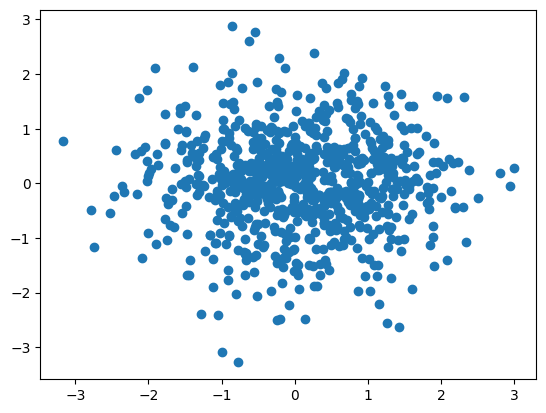

In [171]:
plt.scatter(X_train[:,3], X_train[:,1])
plt.show()

In [172]:
clst = KMeans(n_clusters=3)

In [173]:
clst.fit(X_train)

/home/petr/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [174]:
clst.cluster_centers_

array([[ 1.76336469e-01, -4.01084705e-02,  8.04424728e-02,
         4.76902725e-02, -8.96001536e-02,  1.01503233e+00,
         6.63054671e-02,  4.79714357e-04,  3.52632232e-02,
        -1.14219909e-01,  6.15012973e-03, -3.05226554e-02,
        -7.27580553e-02, -6.05511311e-02, -9.87903700e-01,
        -1.15343323e-01, -1.01057161e-01,  1.91969576e-01,
        -3.51373441e-01,  4.69456525e-02],
       [-3.33862883e-02,  6.36520470e-01,  8.56562614e-02,
         7.06931065e-02, -6.06465618e-02, -1.19610245e+00,
         1.50726973e-02,  1.10147144e-01, -9.48571968e-03,
         1.10674434e-02, -9.20480785e-02,  3.65140010e-02,
         1.89920586e-02,  6.32526890e-02, -2.75117555e-01,
         3.44724867e-02,  1.03889585e-01, -5.70089758e-02,
         6.93634066e-01, -3.27043377e-02],
       [-1.46608225e-01, -1.03209290e+00, -9.59816896e-02,
         1.05384255e-01, -4.19518119e-03,  9.78587712e-01,
        -1.24186079e-01,  3.32105753e-02, -7.58696709e-02,
         1.12011760e-01,  1.9

In [177]:
clust_cat = clst.predict(X_train)
clust_cat

array([2, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 2, 0, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 0, 1,
       0, 1, 1, 0, 2, 1, 2, 1, 2, 0, 1, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2,
       1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 1, 1,
       2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2,
       0, 1, 2, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 2, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1, 0, 2, 2, 1, 0, 0, 0, 1,
       0, 1, 1, 2, 0, 2, 0, 1, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       0, 2, 0, 1, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 1,

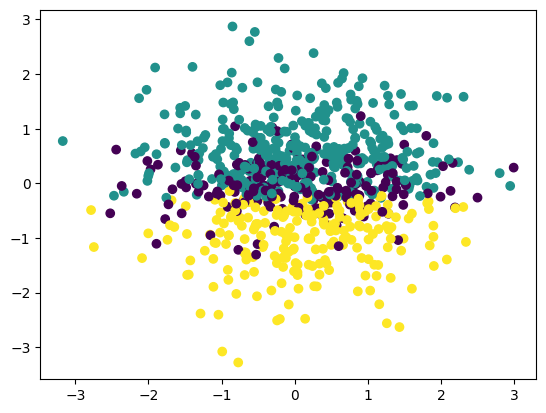

In [178]:
plt.scatter(X_train[:,3], X_train[:,1], c=clust_cat)
plt.show()

In [181]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_train)

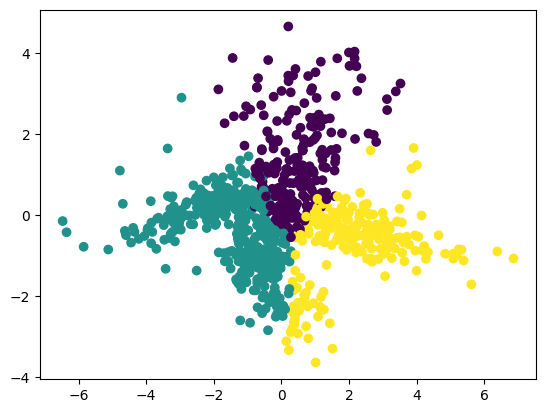

In [182]:
# plot transformed data with our cluster labels (colours)
plt.scatter(pca_data[:,0], pca_data[:,1], c=clust_cat)
plt.show()